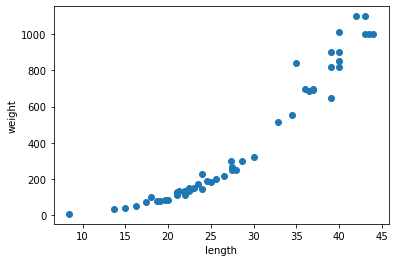

In [2]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(
perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
# reshape(-1, 1)에서 -1 : 행의 크기를 자동 지정
train_input=train_input.reshape(-1, 1)  # 2차원 배열로 변경
test_input=test_input.reshape(-1, 1)   # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

# 모델 훈련
knr.fit(train_input, train_target)

# score 확인
print(knr.score(test_input, test_target))

0.992809406101064


## mean_absolute_error

In [7]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction=knr.predict(test_input)

# 테스트 세트에 대한 평균 절대 오차 계산
mae=mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [8]:
# 테스트 세트를 사용하여 R^2 값 계산
print(knr.score(test_input, test_target))

# 훈련 세트 R^2 값 계산
print(knr.score(train_input, train_target))

0.992809406101064
0.9698823289099254


## 모델 개선 : 이웃 개수 줄이기

In [9]:
knr.n_neighbors=3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print('훈련 데이터로 모델의 정확도 점수 계산 :',
     knr.score(train_input, train_target))
print('테스트 데이터로 모델의 정확도 점수 계산 :', 
     knr.score(test_input, test_target))

# 결과
# 훈련 데이터의 점수가 높아짐

훈련 데이터로 모델의 정확도 점수 계산 : 0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산 : 0.9746459963987609


## 이웃의 수에 따른 그래프 비교

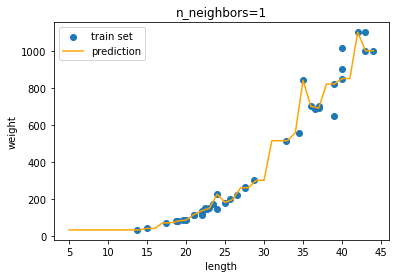

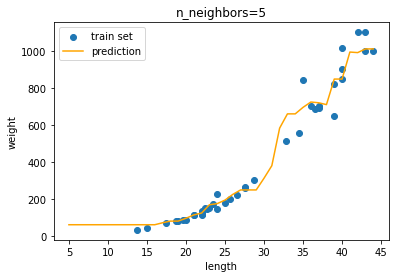

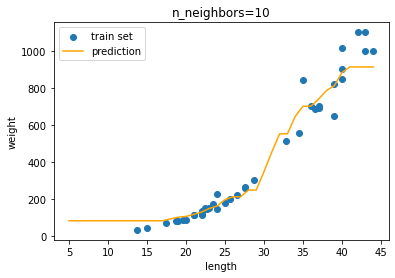

In [12]:
# k-최근접 이웃 회귀 객체 생성
knr=KNeighborsRegressor()

# x:농어의 길이(5~45까지 범위 설정)
x=np.arange(5, 45).reshape(-1, 1)

# n=1, 5, 10일 때 예측 결과 그래프
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors=n
    knr.fit(train_input, train_target)
    
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction=knr.predict(x)
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange')
    
    plt.title('n_neighbors={}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()
    plt.show()

## 훈련 세트 밖의 샘플예측
- 50cm, 100cm 길이의 농어 무게 예측 : 동일한 예측값

In [14]:
train_input, test_input, train_target, test_target=train_test_split(
perch_length, perch_weight, random_state=42)

train_input=train_input.reshape(-1, 1)
test_input=test_input.reshape(-1, 1)

knr=KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm:', knr.predict([[50]]))
print('100cm:', knr.predict([[100]]))

# 결과 : 예측값이 같음

50cm: [1033.33333333]
100cm: [1033.33333333]


- 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교

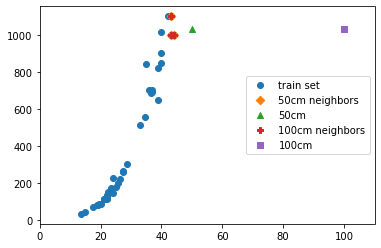

In [16]:
# 50cm 농어의 이웃을 구함
distances_50, indexes_50=knr.kneighbors([[50]])
# 100cm 농어의 이웃을 구함
distances_100, indexes_100=knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target, label='train set')

# 훈련 세트 중에서 50cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_50],
           marker='D', label='50cm neighbors')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^', label='50cm')

# 훈련 세트 중에서 100cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_100], train_target[indexes_100],
           marker='P', label='100cm neighbors')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='s', label='100cm')

plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

In [17]:
# 훈련 데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes:', indexes_50)
print('100cm neighbor indexes:', indexes_100)

50cm neighbor indexes: [[34  8 14]]
100cm neighbor indexes: [[34  8 14]]


In [18]:
# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

1033.3333333333333
1033.3333333333333
